In [294]:
import tensorflow as tf

In [295]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [296]:
train_images.shape #this means that there are 60k data, each being a numpy array of 28 X 28 wiht a pixel value [0,255]

(60000, 28, 28)

In [297]:
import matplotlib.pyplot as plt

In [298]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

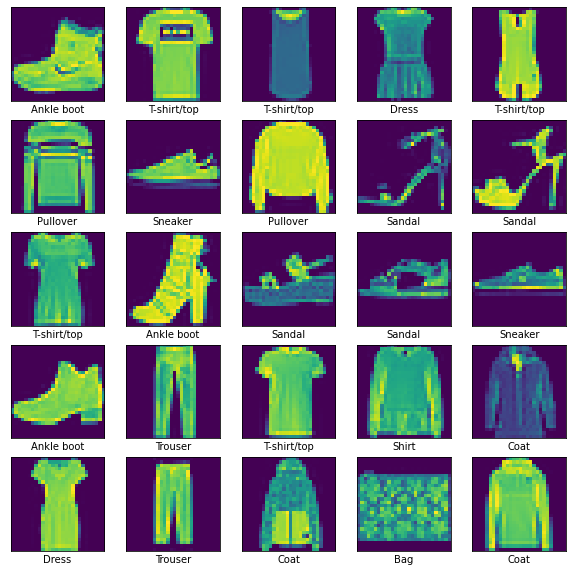

In [299]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [300]:
#nomalizing the data
train_images_norm=train_images/255.0
test_images_norm=test_images/255.0

While building the model we will flaten the data by inteorducing a flatten layer, what it does is that suppose if we had input of size (28,28), it will convert it to one single line imput of (none,28*28) Neaural Models love to work with flatten data 😊

In [301]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),

    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
his=model.fit(train_images_norm,train_labels,epochs=40,verbose=1,validation_data=(test_images_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.5205 - val_accuracy: 0.8259 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4325 - accuracy: 0.8468 - val_loss: 0.4618 - val_accuracy: 0.8352 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4182 - accuracy: 0.8527 - val_loss: 0.4582 - val_accuracy: 0.8381 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4093 - accuracy: 0.8559 - val_loss: 0.4638 - val_accuracy: 0.8384 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8574 - val_loss: 0.4604 - val_accuracy: 0.8351 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

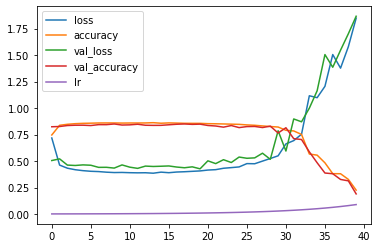

In [302]:
import pandas as pd
pd.DataFrame(his.history).plot()

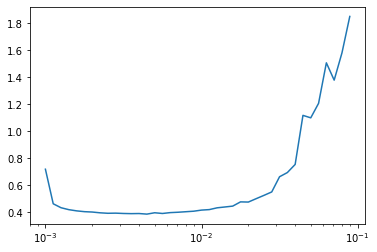

In [303]:
plt.semilogx(his.history['lr'],his.history['loss']) #turns out that 1e-3 is the ideal lr it is also the deafult in adam

Training our model on the ideal learning rate i.e 1e-3

In [304]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics="accuracy")

his=model.fit(train_images_norm,train_labels,epochs=100,verbose=1,validation_data=(test_images_norm,test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_ac

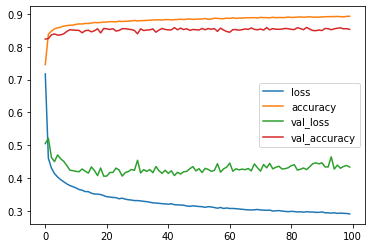

In [305]:
pd.DataFrame(his.history).plot()

In [306]:
model.evaluate(test_images_norm,test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8534


[0.43324121832847595, 0.8533999919891357]

making a function to see the prediction of out model omn random test_data

In [307]:
import random
def rand_predictions(model,test_img,test_lbl,classes):
  i=random.randint(0,len(test_img))
  print(i)
  image=test_img[i] 
  true_label=classes[test_lbl[i]]

  pred_prob=model.predict(tf.expand_dims(image,axis=0))#the image is (28,28) but the model wants (1,28,28)

  idx=pred_prob.argmax() #argmax givs index of max element
  prediction=classes[idx]
  surety=pred_prob[0,idx]*100
  plt.imshow(image)
  plt.xlabel("prediction:{0} | surety:{1}% | true label:{2} ".format(prediction,surety,true_label))

5416


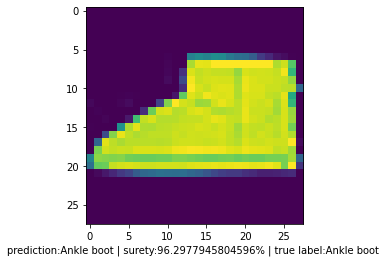

In [308]:
rand_predictions(model,test_images_norm,test_labels,class_names)

In [309]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                7850      
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


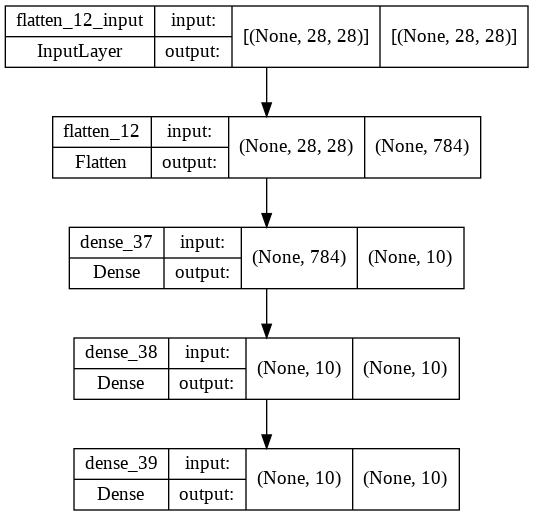

In [310]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes="True")